Missing values (%):
 Name                  0.000000
Location              0.000000
Year                  0.000000
Kilometers_Driven     0.000000
Fuel_Type             0.000000
Transmission          0.000000
Owner_Type            0.000000
Mileage               0.027575
Engine                0.634220
Power                 0.634220
Seats                 0.730732
New_Price            86.129877
Price                17.013650
dtype: float64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               7253 non-null   object 
 1   Location           7253 non-null   object 
 2   Year               7253 non-null   int64  
 3   Kilometers_Driven  7253 non-null   int64  
 4   Fuel_Type          7253 non-null   object 
 5   Transmission       7253 non-null   object 
 6   Owner_Type         7253 non-null   object 
 7   Mileage          

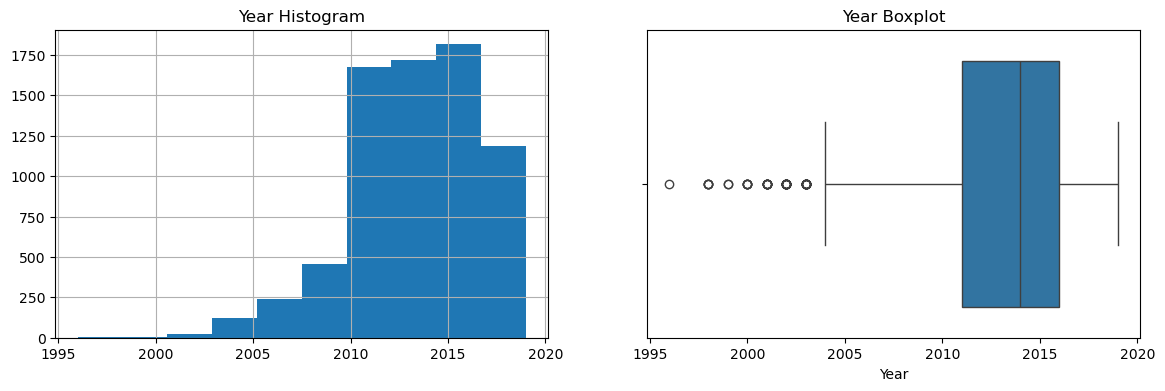

Kilometers_Driven | Skew: 61.58


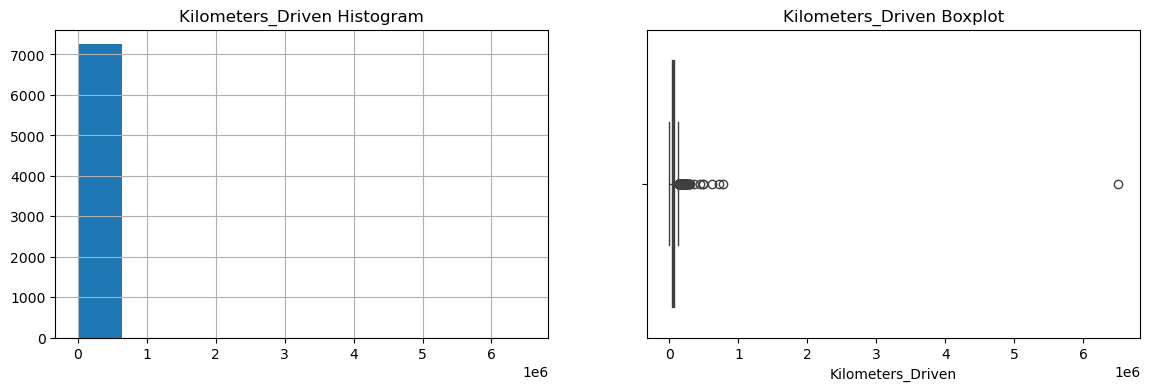

Seats | Skew: 1.9


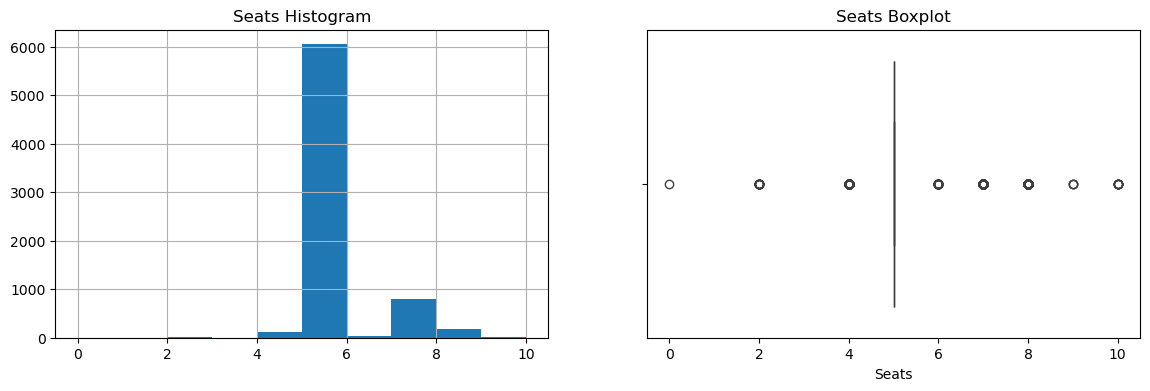

Price | Skew: 3.34


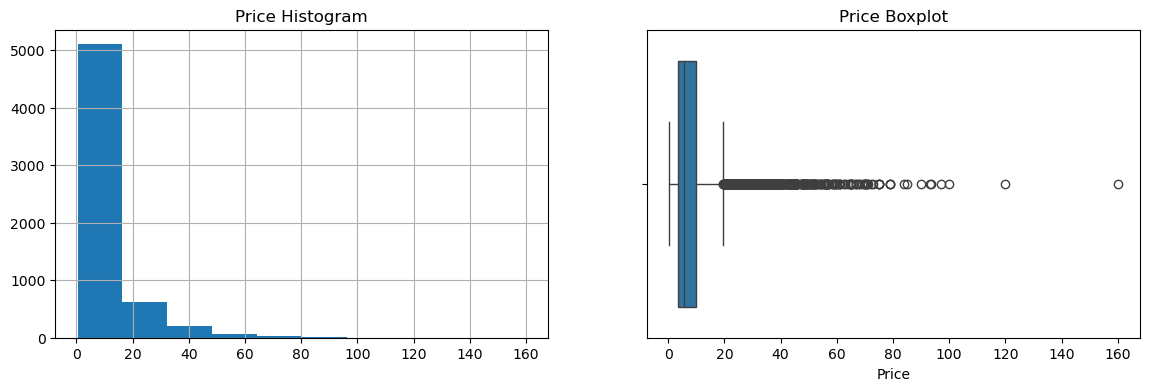

Car_Age | Skew: 0.84


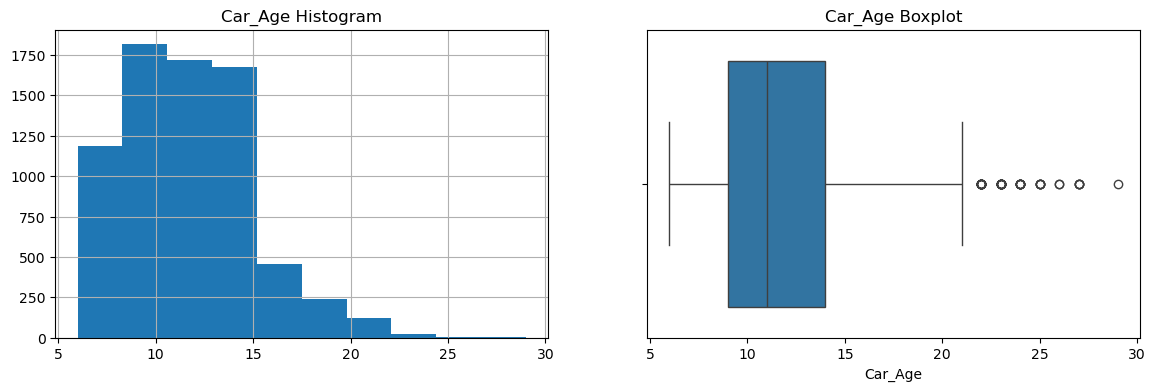

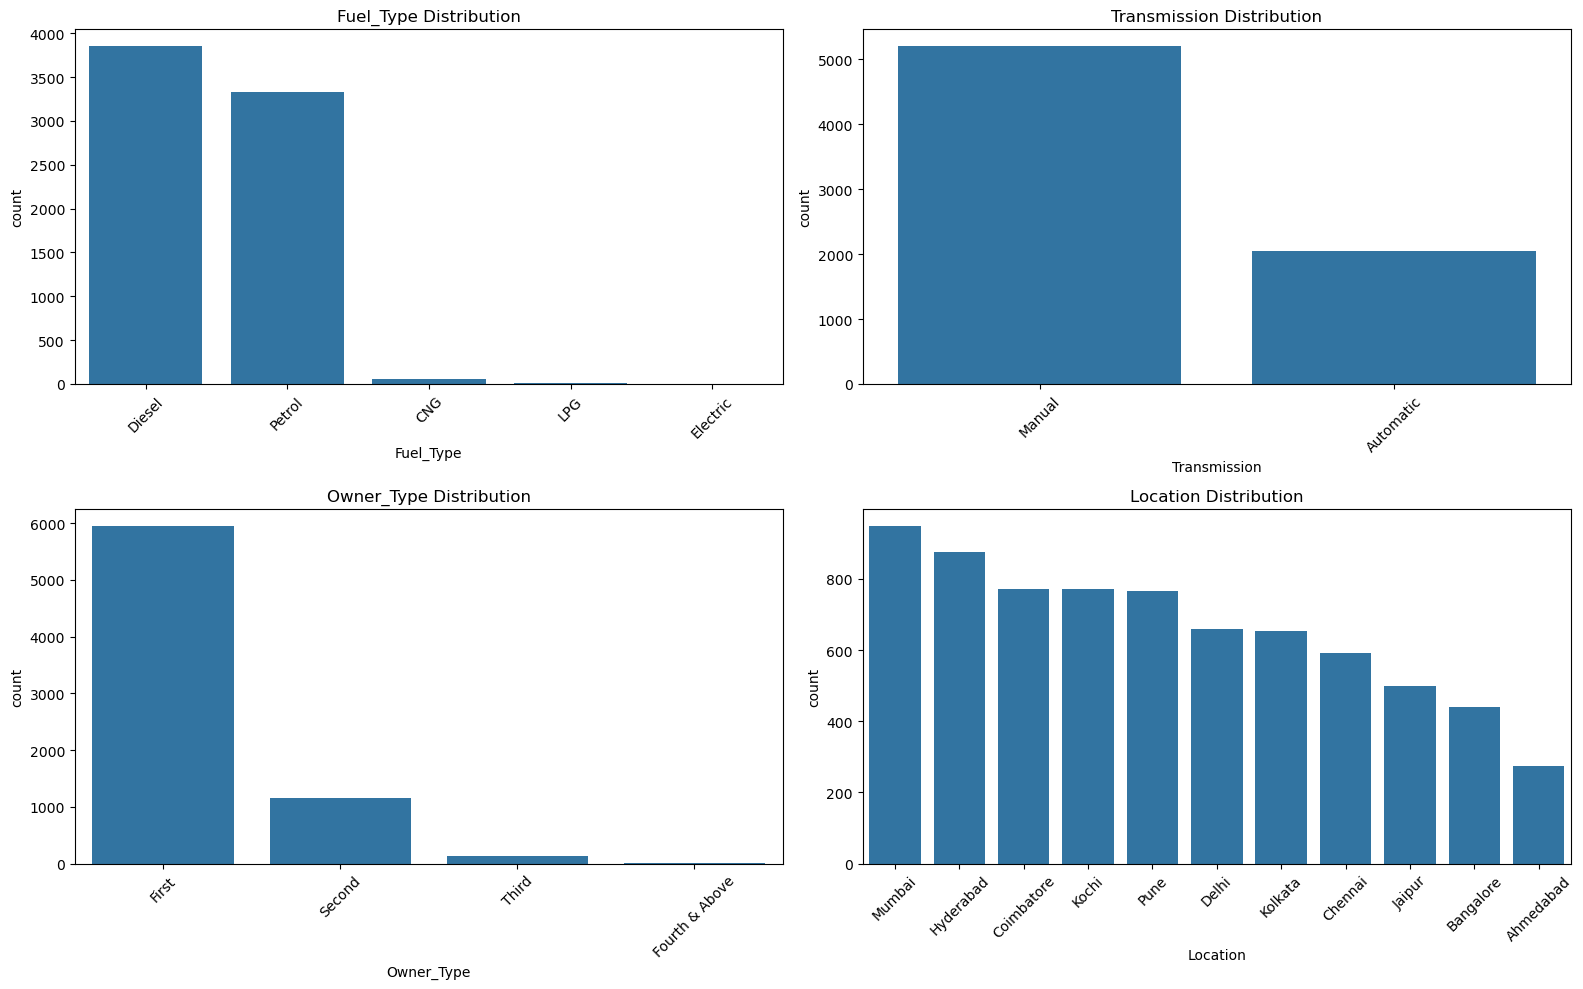

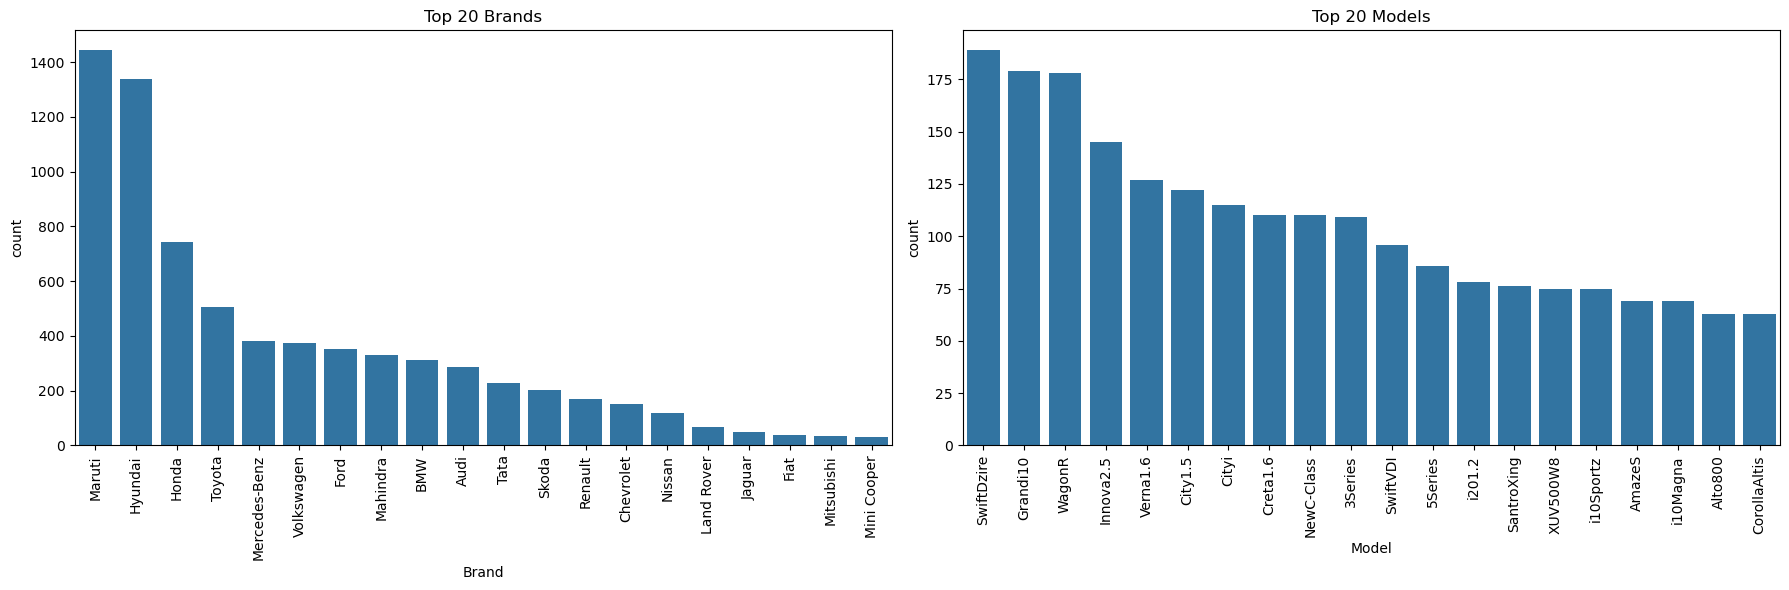

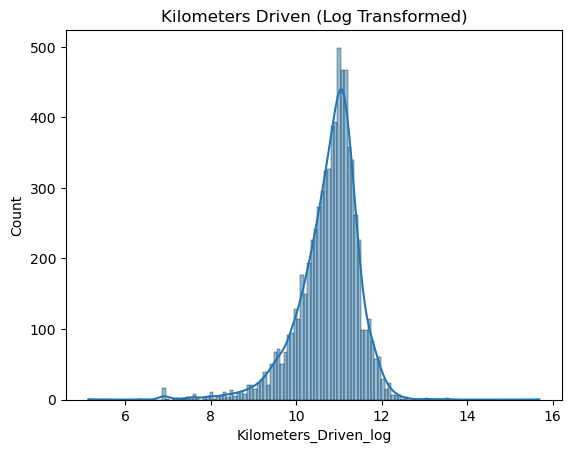

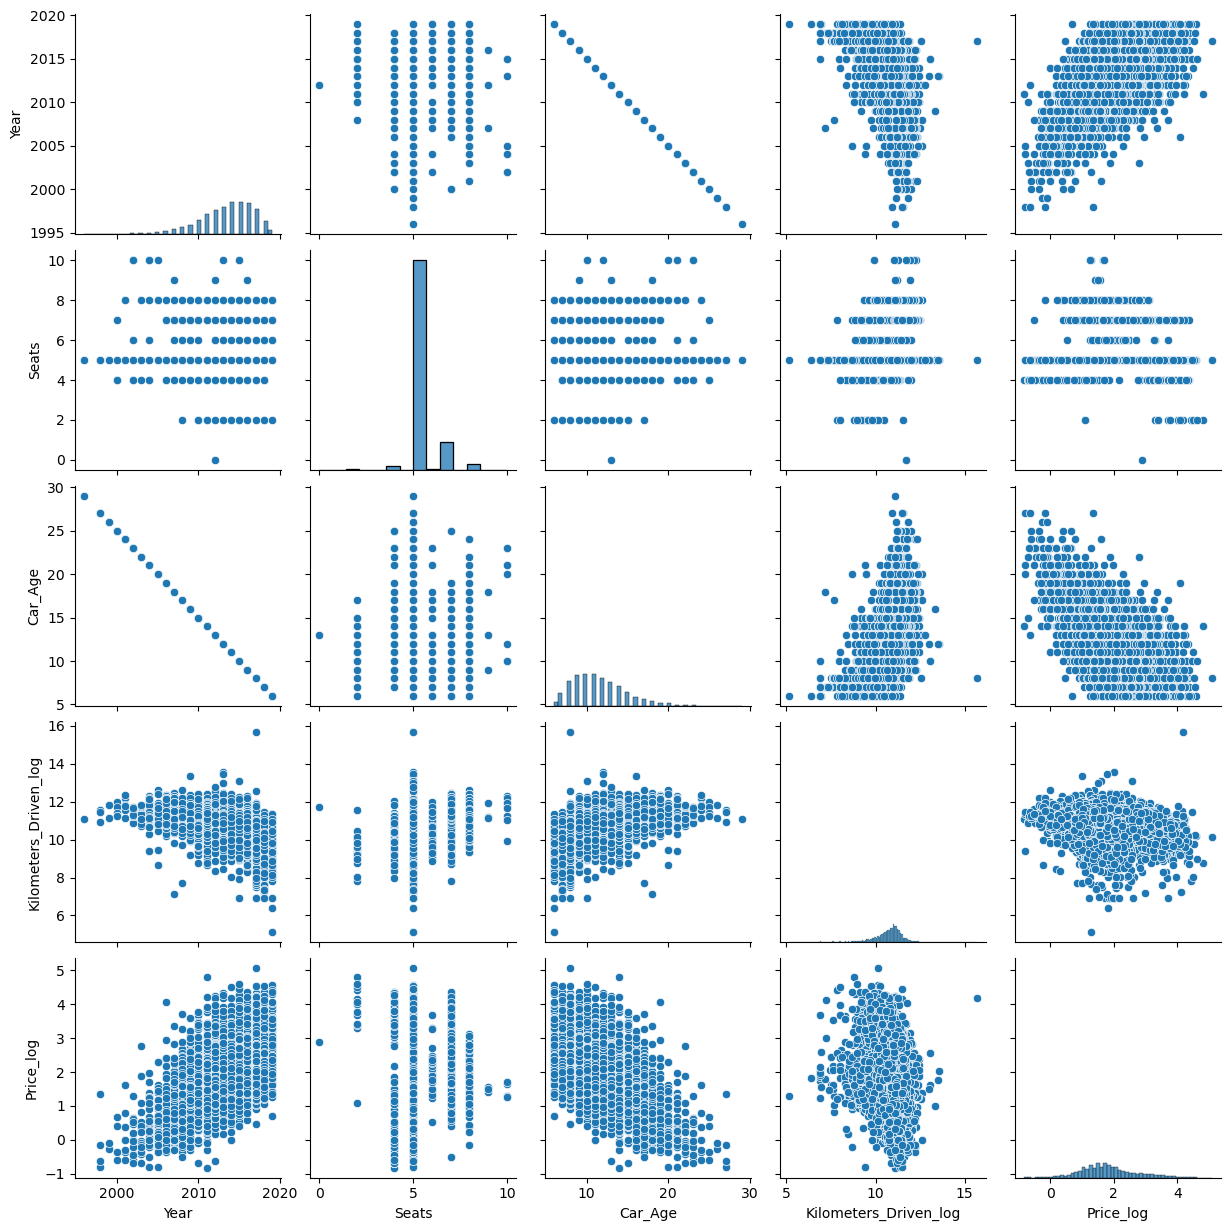

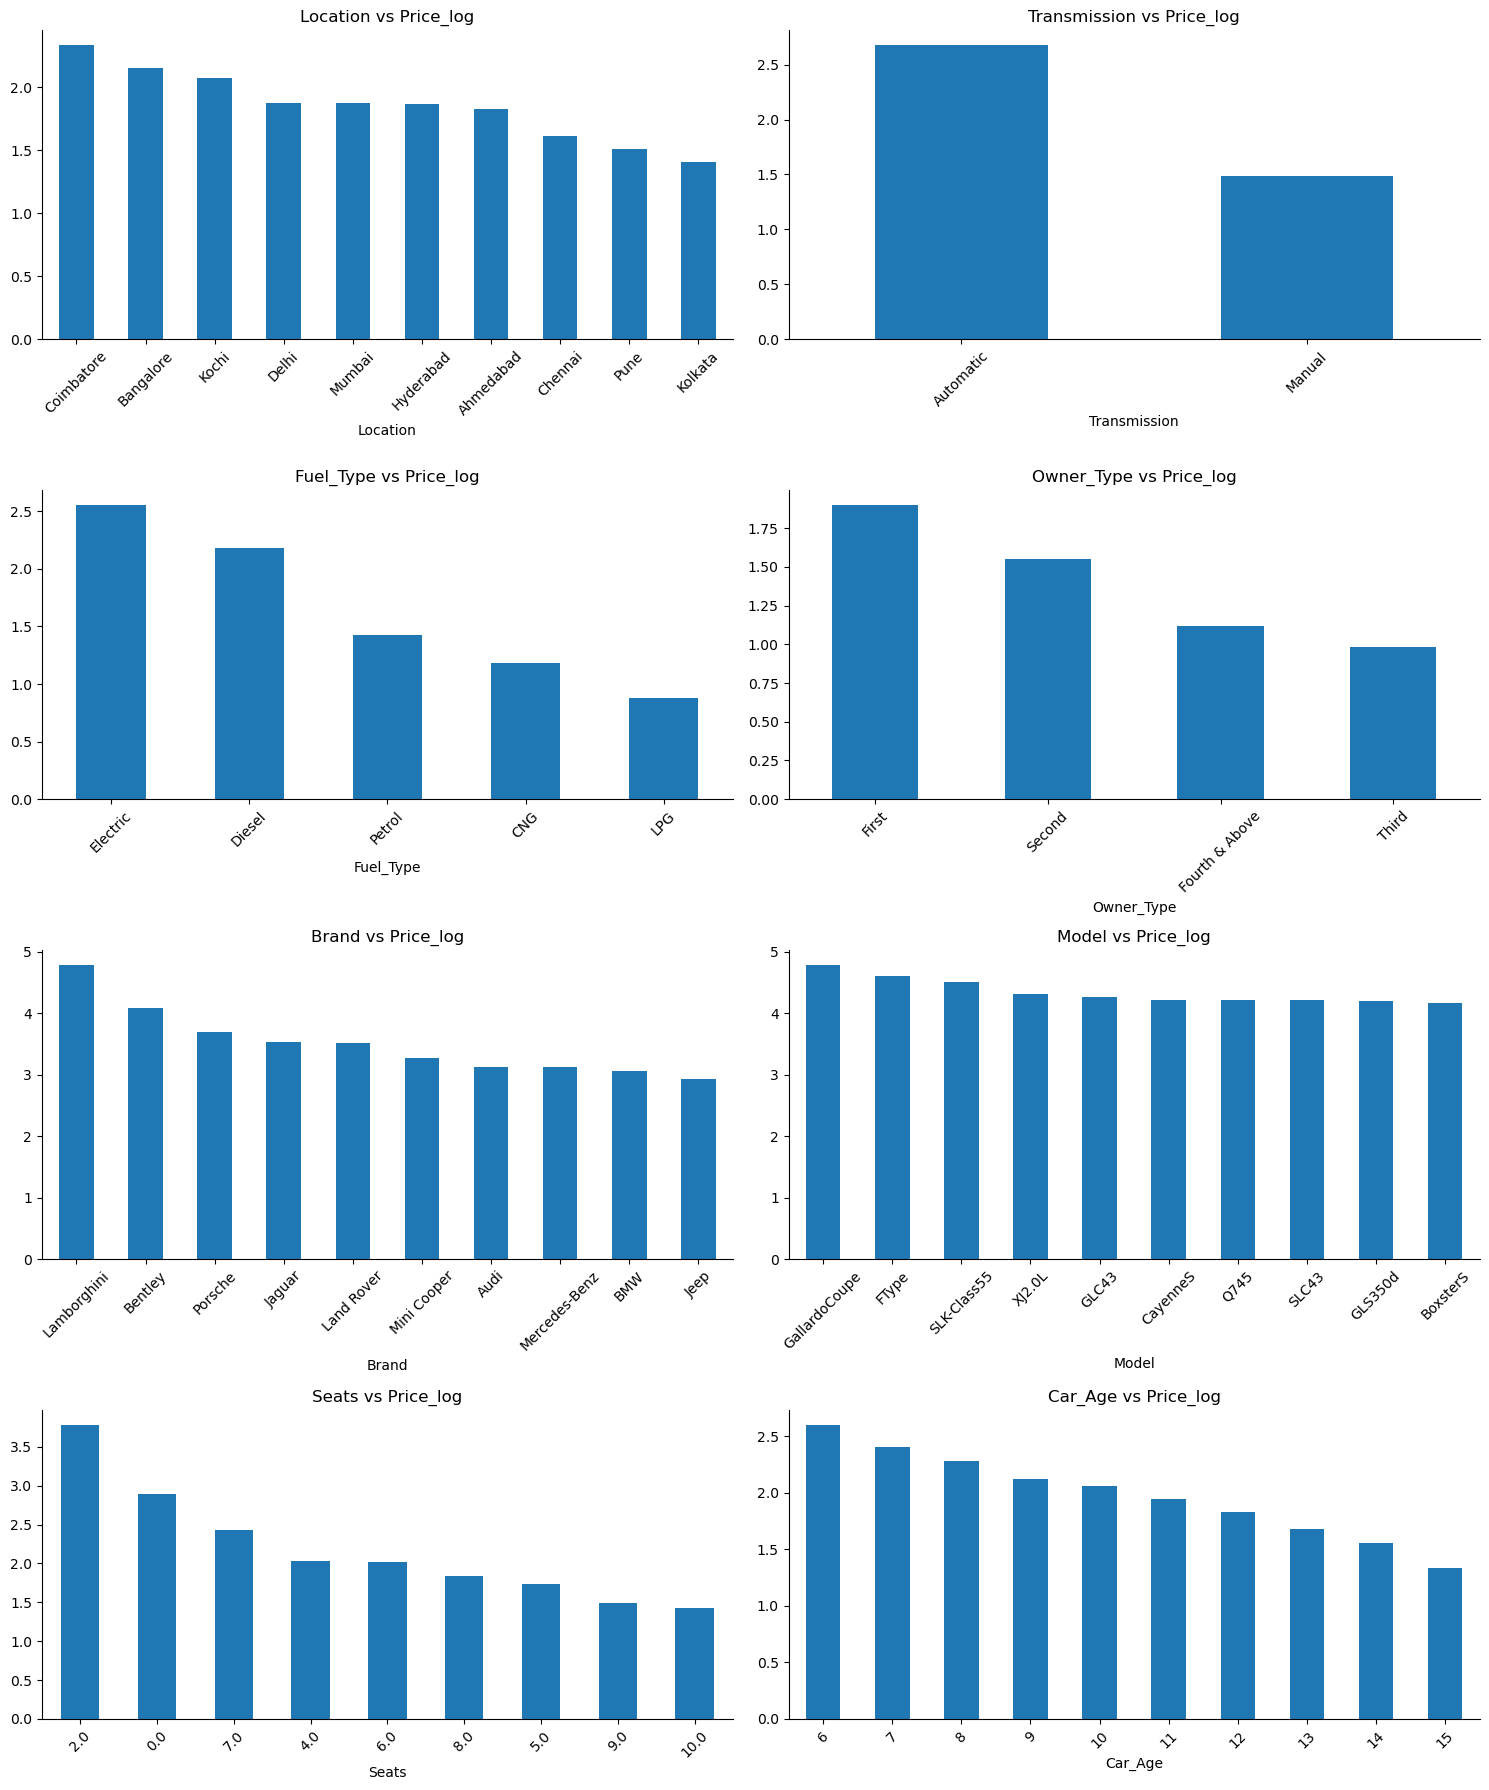

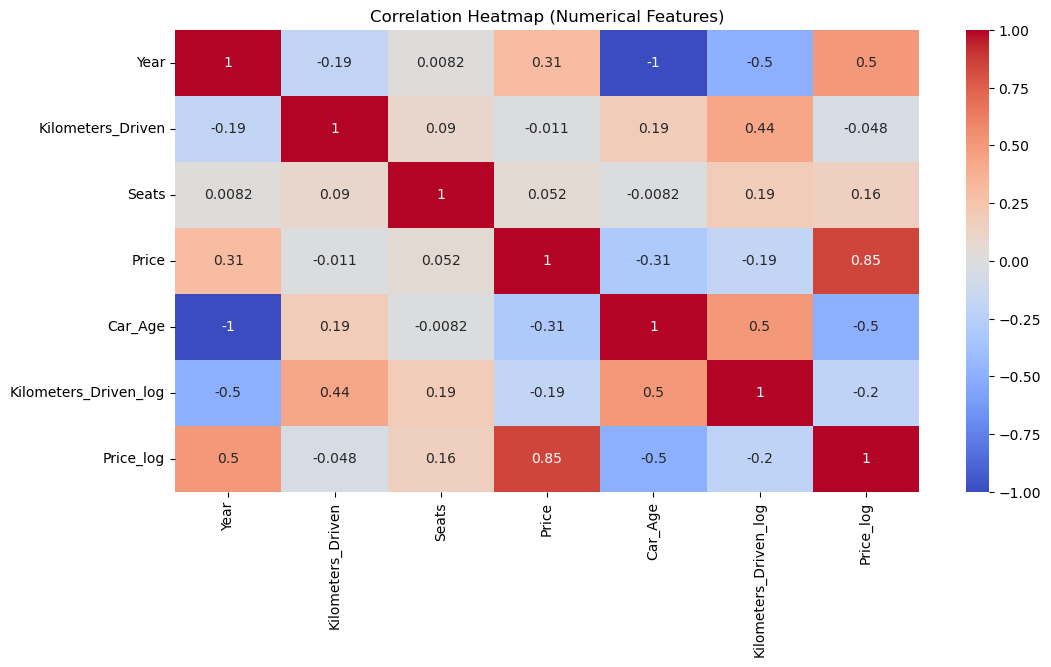

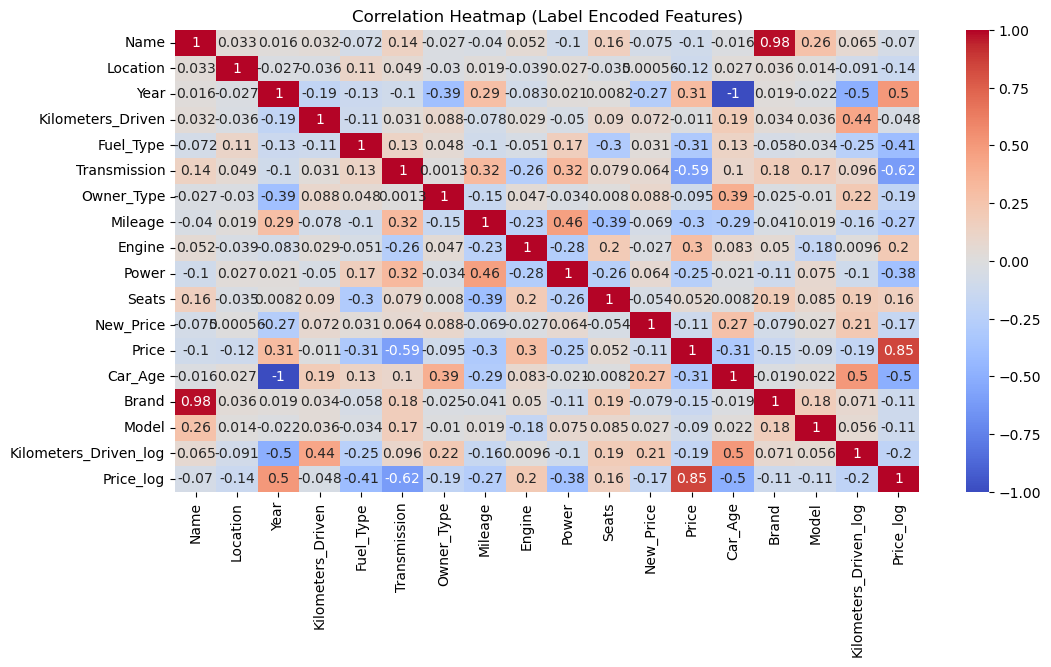

Missing values in 'Mileage': 2


In [1]:
# RUTUJA RAJPUT | ASSIGNMENT 1 | ROLL NO:113

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

# Load dataset
data = pd.read_csv("used_cars.csv")
data.drop(columns=['S.No.'], inplace=True, errors='ignore')

# Check for missing values
print("Missing values (%):\n", (data.isnull().sum() / len(data)) * 100)

# Add derived columns
data['Car_Age'] = date.today().year - data['Year']
data['Brand'] = data.Name.str.split().str[0]
data['Model'] = data.Name.str.split().str[1] + data.Name.str.split().str[2]
data['Brand'].replace({"ISUZU": "Isuzu", "Mini": "Mini Cooper", "Land": "Land Rover"}, inplace=True)

# Data overview
print(data.info())
print(data.describe(include='all').T)

# Column types
cat_cols = data.select_dtypes(include='object').columns
num_cols = data.select_dtypes(include=np.number).columns.tolist()
print("Categorical:", cat_cols.tolist())
print("Numerical:", num_cols)

# Skewness and distributions
for col in num_cols:
    print(f"{col} | Skew: {round(data[col].skew(), 2)}")
    plt.figure(figsize=(14, 4))
    plt.subplot(1, 2, 1)
    data[col].hist()
    plt.title(f"{col} Histogram")
    plt.subplot(1, 2, 2)
    sns.boxplot(x=data[col])
    plt.title(f"{col} Boxplot")
    plt.show()

# Bar plots for categorical variables
cat_plot_cols = ['Fuel_Type', 'Transmission', 'Owner_Type', 'Location']
fig, axes = plt.subplots(2, 2, figsize=(16, 10))
for ax, col in zip(axes.flatten(), cat_plot_cols):
    sns.countplot(x=col, data=data, ax=ax, order=data[col].value_counts().index)
    ax.set_title(f'{col} Distribution')
    ax.tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()

# Top 20 brands & models
fig, axes = plt.subplots(1, 2, figsize=(18, 6))
sns.countplot(x='Brand', data=data, ax=axes[0],
              order=data['Brand'].value_counts().head(20).index)
axes[0].set_title("Top 20 Brands")
axes[0].tick_params(axis='x', rotation=90)

sns.countplot(x='Model', data=data, ax=axes[1],
              order=data['Model'].value_counts().head(20).index)
axes[1].set_title("Top 20 Models")
axes[1].tick_params(axis='x', rotation=90)
plt.tight_layout()
plt.show()

# Log transformation
def log_transform(df, cols):
    for col in cols:
        df[col + '_log'] = np.log(df[col].replace(0, np.nan))  # Avoid log(0)

log_transform(data, ['Kilometers_Driven', 'Price'])

# Log distribution plot
sns.histplot(data["Kilometers_Driven_log"].dropna(), kde=True)
plt.title("Kilometers Driven (Log Transformed)")
plt.show()

# Pairplot excluding original columns
sns.pairplot(data.drop(columns=['Kilometers_Driven', 'Price'], errors='ignore'))
plt.show()

# Price relation with other features
features = ['Location', 'Transmission', 'Fuel_Type', 'Owner_Type',
            'Brand', 'Model', 'Seats', 'Car_Age']
fig, axarr = plt.subplots(4, 2, figsize=(15, 18))
for ax, col in zip(axarr.flat, features):
    data.groupby(col)['Price_log'].mean().sort_values(ascending=False).head(10).plot(kind='bar', ax=ax)
    ax.set_title(f"{col} vs Price_log")
    ax.tick_params(axis='x', rotation=45)
plt.tight_layout()
sns.despine()

# Heatmap with numeric columns
plt.figure(figsize=(12, 6))
sns.heatmap(data.select_dtypes(include='number').corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Heatmap (Numerical Features)")
plt.show()

# Label encoding and second heatmap
data_encoded = data.copy()
for col in cat_cols:
    data_encoded[col] = LabelEncoder().fit_transform(data_encoded[col])

plt.figure(figsize=(12, 6))
sns.heatmap(data_encoded.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Heatmap (Label Encoded Features)")
plt.show()

# Replace 0.0 in Mileage with NaN and show missing count
data.loc[data["Mileage"] == 0.0, 'Mileage'] = np.nan
print(f"Missing values in 'Mileage': {data.Mileage.isnull().sum()}")


In [3]:
import pandas as pd

# Load dataset
df = pd.read_csv("diabetes.csv")

# Basic info
print(df.head(), "\n")
print(df.tail(), "\n")
print(df.info(), "\n")
print(df.describe(), "\n")
print("Columns:", df.columns.tolist(), "\n")

# Check for missing values and shape
print("Missing values:\n", df.isnull().sum(), "\n")
print("Dataset shape (rows, columns):", df.shape, "\n")

# Explore target column 'Outcome'
if 'Outcome' in df.columns:
    print("Unique values in 'Outcome':", df['Outcome'].unique())
    print("Value counts:\n", df['Outcome'].value_counts())
else:
    print("Column 'Outcome' not found.")


   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1   

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766  